In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage.color import rgb2gray
from scipy import *
from scipy import signal
from scipy import ndimage

In [2]:
image1 = Image.open('../data/toy_image.jpg')

In [3]:
image1 = np.asanyarray(image1)

In [4]:
gray1 = rgb2gray(image1)

In [5]:
mpimg.imsave('Results/gray_toy_image.jpg',gray1, cmap='gray')

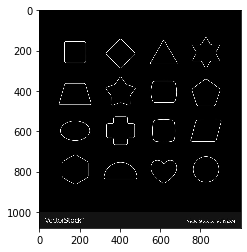

In [6]:
plt.imshow(gray1, cmap='gray')

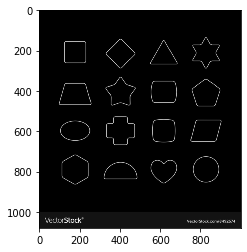

In [7]:
gray1_blurred = ndimage.gaussian_filter(gray1, sigma=1)
plt.imshow(gray1_blurred, cmap='gray')


In [8]:
#function for calculating gaussian derivative filter # sobel filter with normalisation
def normalized_gauss_deriv(img):
    Gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
    Resx = ndimage.convolve(img, Gx)
    Resx = Resx/np.max(Resx)
    
    Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
    Resy = ndimage.convolve(img, Gy)
    Resy = Resy/np.max(Resy)
    
    return Resx, Resy

In [9]:
Fx, Fy = normalized_gauss_deriv(gray1_blurred)

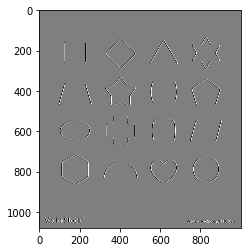

In [10]:
plt.imshow(Fx, cmap='gray')
plt.show()
mpimg.imsave('Results/Fx_toy_image.jpg',Fx, cmap='gray')

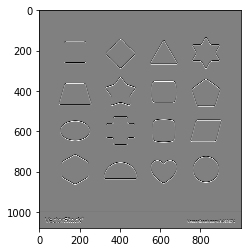

In [11]:
plt.imshow(Fy, cmap='gray')
plt.show()
mpimg.imsave('Results/Fy_toy_image.jpg',Fy, cmap='gray')

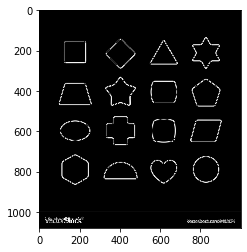

In [12]:
#At each pixel, compute the edge strength F (gradient magnitude)
gm = np.hypot(Fx,Fy)
gm = gm/np.max(gm)
plt.imshow(gm, cmap='gray')
plt.show()
mpimg.imsave('Results/gradMag_toy_image.jpg',gm, cmap='gray')

In [13]:
#and the edge orientation D = atan(Fy/Fx)
D = np.degrees(np.arctan2(Fy,Fx))


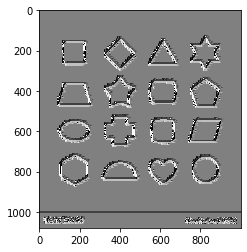

In [14]:
plt.imshow(D, cmap='gray')
plt.show()
mpimg.imsave('Results/arcTan_toy_image.jpg',D, cmap='gray')

In [15]:
#Non-maximal Suppression
# F is gradient magnitude
# D is arctan one
def Phase2(F, D):
    out = np.zeros(F.shape)
    for i in range(1, int(F.shape[0]) - 1):
        for j in range(1, int(F.shape[1]) - 1):
            if((D[i,j] >= -22.5 and D[i,j] <= 22.5) or (D[i,j] <= -157.5 and D[i,j] >= 157.5)):
                if((F[i,j] > F[i,j+1]) and (F[i,j] > F[i,j-1])):
                    out[i,j] = F[i,j]
                else:
                    out[i,j] = 0
            if((D[i,j] >= 22.5 and D[i,j] <= 67.5) or (D[i,j] <= -112.5 and D[i,j] >= -157.5)):
                if((F[i,j] > F[i+1,j+1]) and (F[i,j] > F[i-1,j-1])):
                    out[i,j] = out[i,j]
                else:
                    out[i,j] = 0
            if((D[i,j] >= 67.5 and D[i,j] <= 112.5) or (D[i,j] <= -67.5 and D[i,j] >= -112.5)):
                if((F[i,j] > F[i+1,j]) and (F[i,j] > F[i-1,j])):
                    out[i,j] = F[i,j]
                else:
                    out[i,j] = 0
            if((D[i,j] >= 112.5 and D[i,j] <= 157.5) or (D[i,j] <= -22.5 and D[i,j] >= -67.5)):
                if((F[i,j] > F[i+1,j-1]) and (F[i,j] > F[i-1,j+1])):
                    out[i,j] = F[i,j]
                else:
                    out[i,j] = 0

    return out

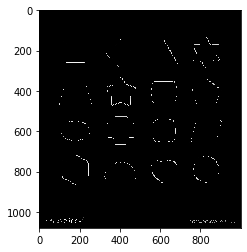

In [16]:
I = Phase2(gm, D);
I = I/np.max(I)
plt.imshow(I, cmap='gray')
plt.show()
mpimg.imsave('Results/nms_toy_image.jpg',I, cmap='gray')

In [17]:
def HystThresh(img):
    highT = 0.83
    lowT = 0.70
    h = int(img.shape[0])
    w = int(img.shape[1])
    res = np.zeros(img.shape)
    out = np.copy(img)
    
    for i in range(0, h-1):
        for j in range(0, w-1):
            if(img[i][j]>=highT):
                res[i][j]=2
            elif(img[i][j]>=lowT):
                res[i][j]=1
            else:
                res[i][j]=0
    x = 0.1
    outx = 0
    
    while(outx != x):
        outx = x
        for i in range (1, h-1):
            for j in range(1, w-1):
                if(res[i][j]==1):
                    if((res[i-1][j]==2) or (res[i-1][j+1]==2) or (res[i-1][j-1]==2) or (res[i+1][j]==2) or (res[i+1][j-1]==2) or (res[i+1][j+1]==2) or (res[i][j-1]==2) or (res[i][j+1]==2)):
                        res[i][j]=2
        x = np.sum(res == 2)
        
    res = (res == 2)*res
        
    for i in range(0, h-1):
        for j in range(0, w-1):
            if(res[i][j]==2):
                out[i][j] = res[i][j]
            else:
                out[i][j] = 0
                
    return out

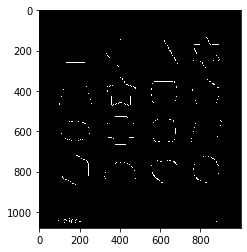

In [18]:
Result_Image = HystThresh(I)
#Result_Image = my_linking(I, D, 0.35, 0.18)
mpimg.imsave('Results/hystThresh0.70-0.83_toy_image.jpg',Result_Image, cmap='gray')
plt.imshow(Result_Image, cmap = plt.get_cmap('gray'))
plt.show()
